In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

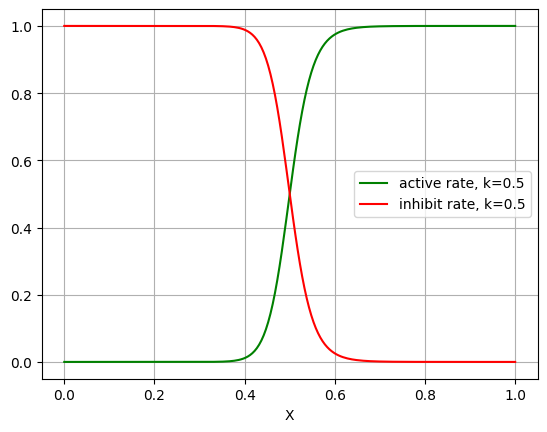

In [13]:
n = 20
def active_rate_func(x, k):
    return (x ** n) / ((k ** n) + (x ** n))

def inhibit_rate_func(x, k):
    return (k ** n) / ((k ** n) + (x ** n))


x = np.linspace(0, 1, 200)
active_r = active_rate_func(x, 0.5)
inhibit_r = inhibit_rate_func(x, 0.5)

plt.plot(x, active_r, 'g', label='active rate, k=0.5')
plt.plot(x, inhibit_r, 'r', label='inhibit rate, k=0.5')

plt.legend(loc='best')
plt.xlabel('X')
plt.grid();plt.show()

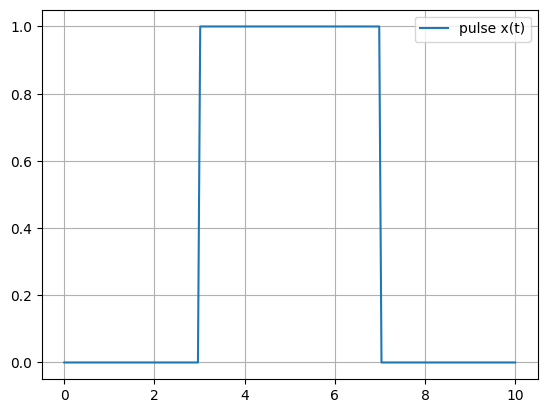

In [16]:
def x_pulse(t, t_0, tau, x_0):
    return np.logical_and(t >= t_0, t <= (t_0 + tau)) * x_0

t_amount = 200
t_max = 10
t = np.linspace(0, t_max, t_amount)

x = x_pulse(t, 3.0, 4.0, 1.0)
plt.plot(t, x, label='pulse x(t)')
plt.legend(loc='best')
plt.grid();plt.show()

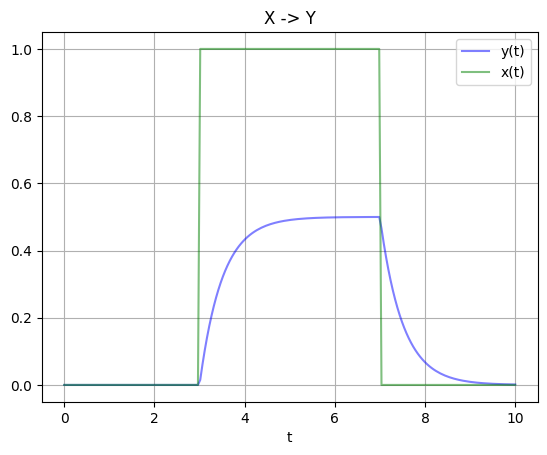

In [19]:
def xy_dyn(y, t, x):
    # using a simple step function 
    # dydt = beta*x - alpha*y
    
    dydt = beta * active_rate_func(x, 0.5) - alpha * y
    return dydt

def xy_dyn_wrap(y, t):
    x = x_pulse(t, 3.0, 4.0, 1.0)
    return xy_dyn(y, t, x)

alpha = 2
beta = 1

y0 = 0.00001
y = odeint(xy_dyn_wrap, y0, t)

plt.plot(t, y[:, 0], 'b', label='y(t)', alpha=0.5)
plt.plot(t, x, 'g', label='x(t)', alpha=0.5)
plt.legend(loc='best'); plt.title("X -> Y")
plt.xlabel('t');plt.grid();plt.show()

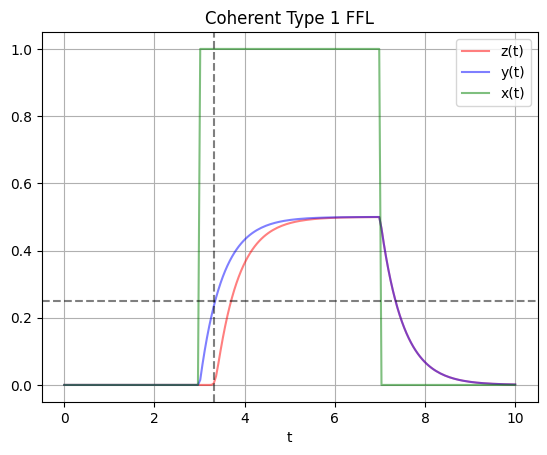

In [20]:
k_yz = 0.25

def ffl_dyn(zy, t, x):   
    z, y = zy
    teta_x = active_rate_func(x, 0.5)
    teta_y = active_rate_func(y, k_yz)
    
    dydt = beta * teta_x - alpha * y
    dzdt = beta * teta_x * teta_y - alpha * z
    return np.array([dzdt, dydt])

def ffl_dyn_wrap(zy, t):
    x = x_pulse(t, 3.0, 4.0, 1.0)
    return ffl_dyn(zy, t, x)

zy_0 = np.array([0.00001, 0.00001])
zy = odeint(ffl_dyn_wrap, zy_0, t)

plt.plot(t, zy[:, 0], 'red', label='z(t)', alpha=0.5)
plt.plot(t, zy[:, 1], 'blue', label='y(t)', alpha=0.5)
plt.plot(t, x, 'g', label='x(t)', alpha=0.5)
plt.legend(loc='best'); plt.title("Coherent Type 1 FFL")

t_y_th = np.where(np.isclose(zy[:, 1], k_yz, rtol=1e-01))[0][0]
t_th = t[t_y_th]

plt.axvline(x=t_th, color='black', alpha=0.5, linestyle='dashed')
plt.axhline(y=k_yz, color='black', alpha=0.5, linestyle='dashed')

plt.xlabel('t');plt.grid();plt.show()

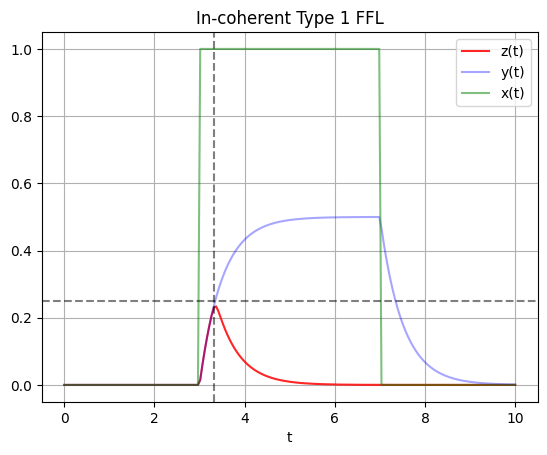

In [21]:
k_yz = 0.25

def ic_ffl_dyn(zy, t, x):   
    z, y = zy
    teta_x = active_rate_func(x, 0.5)
    teta_y = inhibit_rate_func(y, k_yz)
    
    dydt = beta * teta_x - alpha * y
    dzdt = beta * teta_x * teta_y - alpha * z
    return np.array([dzdt, dydt])

def ic_ffl_dyn_wrap(zy, t):
    x = x_pulse(t, 3.0, 4.0, 1.0)
    return ic_ffl_dyn(zy, t, x)

zy_0 = np.array([0.00001, 0.00001])
zy = odeint(ic_ffl_dyn_wrap, zy_0, t)

plt.plot(t, zy[:, 0], 'red', label='z(t)', alpha=0.85)
plt.plot(t, zy[:, 1], 'blue', label='y(t)', alpha=0.35)
plt.plot(t, x, 'g', label='x(t)', alpha=0.5)
plt.legend(loc='best'); plt.title("In-coherent Type 1 FFL")

t_y_th = np.where(np.isclose(zy[:, 1], k_yz, rtol=1e-01))[0][0]
t_th = t[t_y_th]

plt.axvline(x=t_th, color='black', alpha=0.5, linestyle='dashed')
plt.axhline(y=k_yz, color='black', alpha=0.5, linestyle='dashed')

plt.xlabel('t');plt.grid();plt.show()

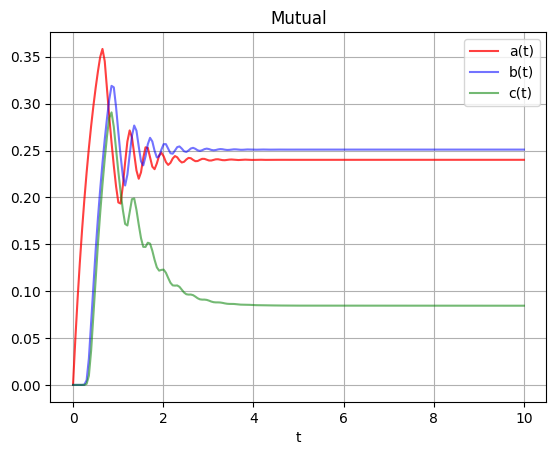

In [22]:
k_ab = 0.24
k_ac = 0.26

k_ba = 0.25
k_ca = 0.25

def mutual_dyn(abc, t):   
    a, b, c = abc

    dbdt = beta * active_rate_func(a, k_ab) - alpha * b
    dcdt = beta * active_rate_func(a, k_ac) - alpha * c

    dadt = beta * inhibit_rate_func(b, k_ba) * inhibit_rate_func(c, k_ca) - alpha * a

    return np.array([dadt, dbdt, dcdt])


abc_0 = np.array([0.00001, 0.00001, 0.00001])
abc = odeint(mutual_dyn, abc_0, t)

plt.plot(t, abc[:, 0], 'red', label='a(t)', alpha=0.75)
plt.plot(t, abc[:, 1], 'blue', label='b(t)', alpha=0.55)
plt.plot(t, abc[:, 2], 'green', label='c(t)', alpha=0.55)

plt.legend(loc='best'); plt.title("Mutual")
plt.xlabel('t');plt.grid();plt.show()